In [1]:
import csv
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
from sklearn import metrics
import tensorflow as tf
print(tf.__version__)

2.12.0


In [2]:
random_seed = 42
n_time_steps = 5 #taking 3 seconds
n_features = 132
step = 2 #taking 1.5 seconds
n_classes = 2
n_epochs = 15
batch_size = 32
learning_rate = 0.00025
l2_loss = 0.0015

In [3]:
import pandas as pd
import os

# Specify the folder where your CSV files are located
folder_path = "C:/aryaaa/arya's model(2)/yoga poses csv"

# Specify the names of the CSV files you want to access
file_names_to_access = ["Triangle_normal.csv", "Triangle pose.csv"]

# Initialize an empty list to hold individual DataFrames
data_frames = []

# Loop through the specified file names and read and append their data to the data_frames list
for file_name in file_names_to_access:
    file_path = os.path.join(folder_path, file_name)
    data = pd.read_csv(file_path)
    data_frames.append(data)

# Combine the individual DataFrames into one DataFrame
df = pd.concat(data_frames).reset_index(drop=True)

# Check the shape of the combined_data DataFrame
print(df.shape)


(35197, 133)


In [4]:
df.head()

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,triangle_normal,-0.013406,-0.655149,-0.280099,0.999994,-0.002756,-0.692532,-0.262204,0.999975,-0.002267,...,0.233478,0.772697,0.071811,0.836216,0.104075,0.965592,-0.053098,0.835295,0.111487,0.962842
1,triangle_normal,-0.008976,-0.655663,-0.269597,0.999994,0.000953,-0.693035,-0.250388,0.999975,0.001409,...,0.208410,0.769073,0.087529,0.841175,0.090210,0.966205,-0.040501,0.833780,0.082215,0.963059
2,triangle_normal,-0.007142,-0.655720,-0.267627,0.999994,0.002244,-0.693115,-0.248315,0.999974,0.002685,...,0.203563,0.765499,0.095466,0.842348,0.089522,0.966649,-0.033269,0.831355,0.076724,0.963115
3,triangle_normal,-0.005624,-0.656083,-0.264618,0.999993,0.003432,-0.693514,-0.245289,0.999973,0.003864,...,0.202679,0.763639,0.100439,0.843132,0.088621,0.967180,-0.029694,0.829660,0.076368,0.963395
4,triangle_normal,-0.004038,-0.656897,-0.259039,0.999993,0.004694,-0.694354,-0.239623,0.999971,0.005124,...,0.204378,0.761031,0.102679,0.843246,0.089160,0.967617,-0.027258,0.827905,0.078557,0.963522


In [5]:
df.tail()

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
35192,triangle_pose,0.595749,-0.356144,-0.207444,0.999217,0.615633,-0.319636,-0.223656,0.999121,0.616211,...,0.293448,0.446780,0.638741,0.544517,0.062707,0.402546,-0.210676,0.685760,0.273485,0.520422
35193,triangle_pose,0.595734,-0.356031,-0.207360,0.999220,0.615640,-0.319506,-0.223547,0.999123,0.616220,...,0.286959,0.457487,0.641670,0.544716,0.061611,0.406327,-0.206682,0.688403,0.263464,0.531651
35194,triangle_pose,0.595684,-0.356029,-0.208855,0.999238,0.615617,-0.319475,-0.225084,0.999143,0.616200,...,0.286415,0.466384,0.670601,0.542656,0.061104,0.409377,-0.189035,0.688339,0.263501,0.541179
35195,triangle_pose,0.595096,-0.355750,-0.208978,0.999250,0.615169,-0.319135,-0.225295,0.999158,0.615759,...,0.280768,0.479508,0.693624,0.539639,0.061288,0.411669,-0.192782,0.690347,0.259203,0.554154
35196,triangle_pose,0.594961,-0.355547,-0.209410,0.999262,0.615076,-0.318841,-0.225838,0.999173,0.615669,...,0.278738,0.491117,0.696756,0.539761,0.062332,0.415858,-0.191946,0.690767,0.258882,0.565008


In [6]:
pip install -U imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


In [7]:
from imblearn.over_sampling import SMOTE

# Assuming df is your DataFrame and "category" is your target column
X = df.drop('pose_folder', axis=1)
y = df['pose_folder']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

# Create a DataFrame with the rebalanced data
balanced_df = pd.concat([pd.DataFrame(y_sm, columns=['pose_folder']), pd.DataFrame(X_sm)], axis=1)
balanced_df

,pose_folder,0_x,0_y,0_z,0_vis,1_x,1_y,1_z,1_vis,2_x,...,30_z,30_vis,31_x,31_y,31_z,31_vis,32_x,32_y,32_z,32_vis
0,triangle_normal,-0.013406,-0.655149,-0.280099,0.999994,-0.002756,-0.692532,-0.262204,0.999975,-0.002267,...,0.233478,0.772697,0.071811,0.836216,0.104075,0.965592,-0.053098,0.835295,0.111487,0.962842
1,triangle_normal,-0.008976,-0.655663,-0.269597,0.999994,0.000953,-0.693035,-0.250388,0.999975,0.001409,...,0.208410,0.769073,0.087529,0.841175,0.090210,0.966205,-0.040501,0.833780,0.082215,0.963059
2,triangle_normal,-0.007142,-0.655720,-0.267627,0.999994,0.002244,-0.693115,-0.248315,0.999974,0.002685,...,0.203563,0.765499,0.095466,0.842348,0.089522,0.966649,-0.033269,0.831355,0.076724,0.963115
3,triangle_normal,-0.005624,-0.656083,-0.264618,0.999993,0.003432,-0.693514,-0.245289,0.999973,0.003864,...,0.202679,0.763639,0.100439,0.843132,0.088621,0.967180,-0.029694,0.829660,0.076368,0.963395
4,triangle_normal,-0.004038,-0.656897,-0.259039,0.999993,0.004694,-0.694354,-0.239623,0.999971,0.005124,...,0.204378,0.761031,0.102679,0.843246,0.089160,0.967617,-0.027258,0.827905,0.078557,0.963522
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43471,triangle_pose,0.530863,-0.307451,-0.238918,0.999996,0.569600,-0.296161,-0.242093,0.999981,0.570260,...,-0.000461,0.999029,0.533936,0.714426,0.163436,0.991682,-0.575935,0.649579,-0.152082,0.999291
43472,triangle_pose,-0.516373,-0.182901,-0.446867,0.999998,-0.552712,-0.177616,-0.427679,0.999992,-0.553150,...,0.140534,0.945136,0.418358,0.719536,-0.036645,0.984685,-0.552938,0.693908,0.059634,0.952130
43473,triangle_pose,0.025145,-0.043920,-0.639722,0.999982,0.009895,-0.007389,-0.679041,0.999986,0.009673,...,0.360044,0.975745,0.052403,0.402159,0.303007,0.972317,0.101448,0.145852,0.337494,0.950460
43474,triangle_pose,0.487305,-0.186051,-0.393055,0.999997,0.521080,-0.188463,-0.392226,0.999980,0.521978,...,0.171631,0.992550,0.608942,0.767389,-0.029351,0.995790,-0.509428,0.816704,0.062091,0.994884


In [8]:
import numpy as np
import pandas as pd

# Initialize lists to store segments and labels
segments = []
labels = []

# Loop through the data with a specified step
for i in range(0, balanced_df.shape[0], step):
    mylist = []
    label = None  # Initialize label as None

    if i + n_time_steps < balanced_df.shape[0]:
        for j in range(i, i + n_time_steps):
            mylist.append(balanced_df.iloc[j, 1:133].values)  # Assuming you have 321 feature columns

        # Check the label for the segment
        if 'triangle_pose' in balanced_df['pose_folder'].iloc[i:i + n_time_steps].values:
            label = 1  # Set label to 1 if 'seizure' is present in this segment
        else:
            label = 0  # Set label to 0 if 'seizure' is not present

        segments.append(mylist)
        labels.append(label)

# Convert segments and labels to NumPy arrays
reshaped_segments = np.array(segments, dtype=np.float32)
labels_binary = np.array(labels, dtype=np.float32)


In [9]:
labels_binary

array([0., 0., 0., ..., 1., 1., 1.], dtype=float32)

In [10]:
# Add attention layer to the deep learning network
class attention_layer(tf.keras.layers.Layer):
    def __init__(self,**kwargs):
        super().__init__(**kwargs)

    def build(self,input_shape):
        self.W=self.add_weight(name='attention_weight', shape=(input_shape[-1],1),
                               initializer='random_normal', trainable=True)
        self.b=self.add_weight(name='attention_bias', shape=(input_shape[1],1),
                               initializer='zeros', trainable=True)
        super().build(input_shape)

    def call(self,x):
        # Alignment scores. Pass them through tanh function
        e = tf.keras.backend.tanh(tf.keras.backend.dot(x,self.W)+self.b)
        # Remove dimension of size 1
        e = tf.keras.backend.squeeze(e, axis=-1)
        # Compute the weights
        alpha = tf.keras.backend.softmax(e)
        # Reshape to tensorFlow format
        alpha = tf.keras.backend.expand_dims(alpha, axis=-1)
        # Compute the context vector
        context = x * alpha
        context = tf.keras.backend.sum(context, axis=1)
        return context

In [11]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(reshaped_segments, labels_binary, test_size=0.2, random_state=random_seed)

n_classes = 2

y_train = tf.keras.utils.to_categorical(y_train, n_classes)
y_test = tf.keras.utils.to_categorical(y_test, n_classes)

In [12]:
from kerastuner.tuners import Hyperband
# Define a hypermodel using a function
def build_hypermodel(hp):
    input_shape = (X_train.shape[1], X_train.shape[2])
    inputs = tf.keras.Input(shape=input_shape)
    x = tf.keras.layers.LSTM(units=hp.Int('lstm_units', min_value=64, max_value=256, step=32), return_sequences=True)(inputs)
    x = tf.keras.layers.LeakyReLU(alpha=0.5)(x)
    x = tf.keras.layers.LSTM(units=hp.Int('lstm_units_2', min_value=32, max_value=128, step=32), return_sequences=True)(x)
    attention = attention_layer()(x)
    attention = tf.keras.layers.Reshape((-1, 1))(attention)
    x = tf.keras.layers.Conv1D(hp.Int('conv1d_units', min_value=64, max_value=256, step=32), 5, strides=2, activation='relu')(attention)
    x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Conv1D(hp.Int('conv1d_units_2', min_value=32, max_value=128, step=32), 3, strides=1, activation='relu')(x)
    x = tf.keras.layers.MaxPooling1D(pool_size=2, strides=2)(x)
    x = tf.keras.layers.Flatten()(x)
    x = tf.keras.layers.Dense(units=hp.Int('dense_units', min_value=32, max_value=128, step=32), activation='relu')(x)
    x = tf.keras.layers.Dropout(hp.Float('dropout', min_value=0.2, max_value=0.7, step=0.1))(x)
    output = tf.keras.layers.Dense(2, activation='sigmoid')(x)

    model = tf.keras.models.Model(inputs, output)

    model.compile(
        loss=tf.keras.losses.CategoricalCrossentropy(),
        optimizer=tf.keras.optimizers.Adam(learning_rate=hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4])),
        metrics=["accuracy"],
    )
    return model

# Initialize the tuner
tuner = Hyperband(
    build_hypermodel,
    objective='val_accuracy',
    max_epochs=n_epochs,
    factor=3,
    directory='keras_tuner_dir',
    project_name='my_hypermodel'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=n_epochs, validation_split=0.2)

# Get the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]



Using TensorFlow backend


Reloading Tuner from keras_tuner_dir\my_hypermodel\tuner0.json


C:\Users\HPC\AppData\Local\Temp\ipykernel_2032\3016703407.py:1: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import Hyperband


In [13]:
# Build and compile the final model with the best hyperparameters
final_model = tuner.hypermodel.build(best_hps)
final_model.compile(
    loss=tf.keras.losses.CategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=best_hps.get('learning_rate')),
    metrics=["accuracy"],
)

# Train the final model
history = final_model.fit(X_train, y_train, epochs=n_epochs, validation_split=0.20, batch_size=batch_size, verbose=1)

# Evaluate the final model
loss, accuracy = final_model.evaluate(X_test, y_test, batch_size=batch_size, verbose=1)
print("Test Accuracy:", accuracy)
print("Test Loss:", loss)

Epoch 1/15
435/435 [==============================] - 12s 16ms/step - loss: 0.1699 - accuracy: 0.9462 - val_loss: 0.0923 - val_accuracy: 0.9675
Epoch 2/15
435/435 [==============================] - 6s 13ms/step - loss: 0.0973 - accuracy: 0.9680 - val_loss: 0.0854 - val_accuracy: 0.9758
Epoch 3/15
435/435 [==============================] - 5s 12ms/step - loss: 0.0776 - accuracy: 0.9750 - val_loss: 0.0617 - val_accuracy: 0.9822
Epoch 4/15
435/435 [==============================] - 5s 12ms/step - loss: 0.0680 - accuracy: 0.9792 - val_loss: 0.0957 - val_accuracy: 0.9865
Epoch 5/15
435/435 [==============================] - 5s 12ms/step - loss: 0.0596 - accuracy: 0.9802 - val_loss: 0.0552 - val_accuracy: 0.9825
Epoch 6/15
435/435 [==============================] - 5s 12ms/step - loss: 0.0570 - accuracy: 0.9818 - val_loss: 0.0583 - val_accuracy: 0.9822
Epoch 7/15
435/435 [==============================] - 5s 12ms/step - loss: 0.0504 - accuracy: 0.9830 - val_loss: 0.0504 - val_accuracy: 0.982

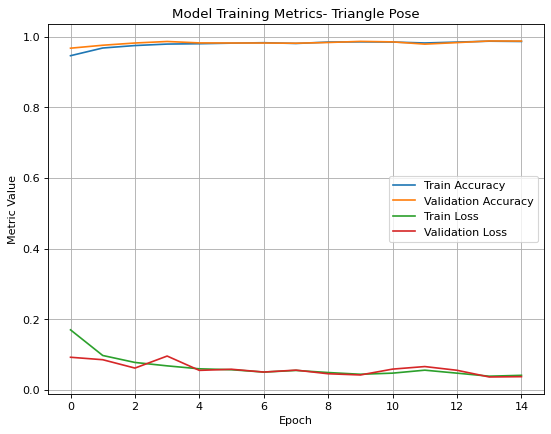

In [14]:
plt.figure(figsize=(8, 6),dpi=80)

# Plotting accuracy
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')

# Plotting loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')

plt.title('Model Training Metrics- Triangle Pose')
plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.legend()
plt.grid(True)
plt.show()

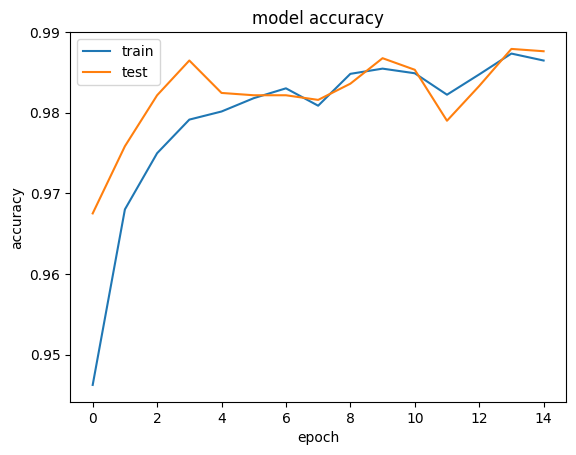

In [15]:
#summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

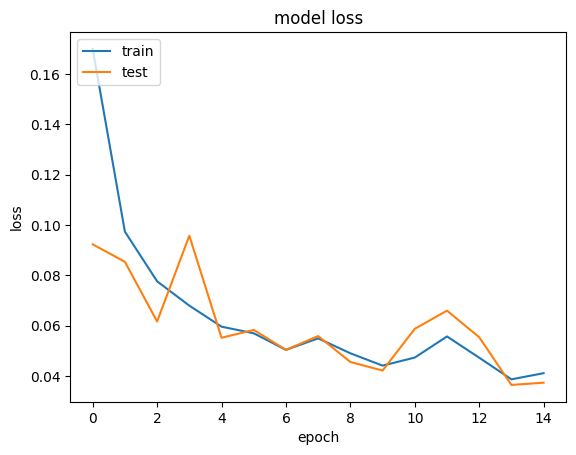

In [16]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

136/136 [==============================] - 1s 4ms/step
True Positives (TP): 2164
True Negatives (TN): 2141
False Positives (FP): 26
False Negatives (FN): 17
AUC: 0.9993347759216813


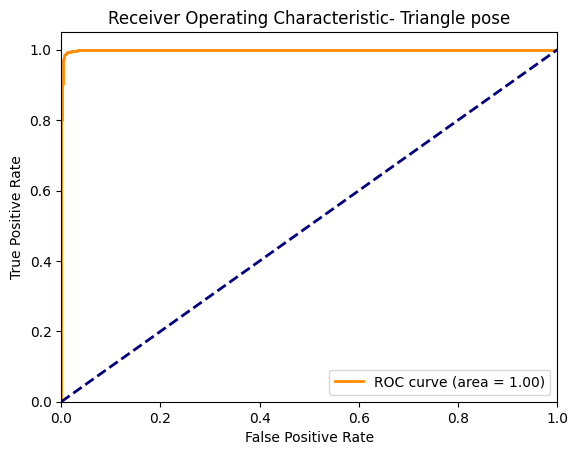

In [17]:
import sklearn

# Evaluate the final model
y_pred = final_model.predict(X_test)
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test[:, 1], y_pred[:, 1])

# Calculate the area under the ROC curve (AUC)
roc_auc = sklearn.metrics.auc(fpr, tpr)

# Calculate True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)
y_pred_binary = np.round(y_pred)  # Convert probabilities to binary predictions
confusion_matrix = sklearn.metrics.confusion_matrix(y_test[:, 1], y_pred_binary[:, 1])
tn, fp, fn, tp = confusion_matrix.ravel()

# Print the TP, TN, FP, FN, and AUC
print("True Positives (TP):", tp)
print("True Negatives (TN):", tn)
print("False Positives (FP):", fp)
print("False Negatives (FN):", fn)
print("AUC:", roc_auc)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic- Triangle pose')
plt.legend(loc="lower right")
plt.show()


In [18]:
final_model.save("C:/aryaaa/arya's model(2)/MTP MODEL/Triangle Pose Model")

INFO:tensorflow:Assets written to: C:/aryaaa/arya's model(2)/MTP MODEL/Triangle Pose Model\assets


INFO:tensorflow:Assets written to: C:/aryaaa/arya's model(2)/MTP MODEL/Triangle Pose Model\assets
